In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Read Data

In [2]:
# We are reading our data
#df = pd.read_csv("processed.cleveland.csv", header = None)
df = pd.read_csv("heart.csv")

In [3]:
# First 5 rows of our data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df['thal'].value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

Data contains; <br>

* age - age in years <br>
* sex - (1 = male; 0 = female) <br>
* cp - chest pain type <br>
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) <br>
* chol - serum cholestoral in mg/dl <br>
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
* restecg - resting electrocardiographic results <br>
* thalach - maximum heart rate achieved <br>
* exang - exercise induced angina (1 = yes; 0 = no) <br>
* oldpeak - ST depression induced by exercise relative to rest <br>
* slope - the slope of the peak exercise ST segment <br>
* ca - number of major vessels (0-3) colored by flourosopy <br>
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br>
* target - have disease or not (1=yes, 0=no)

## Data Exploration

In [8]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

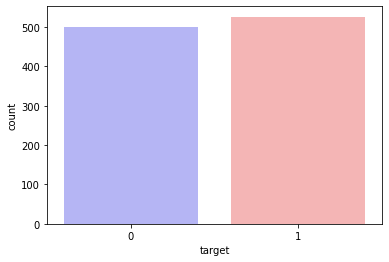

In [9]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [10]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 48.68%
Percentage of Patients Have Heart Disease: 51.32%


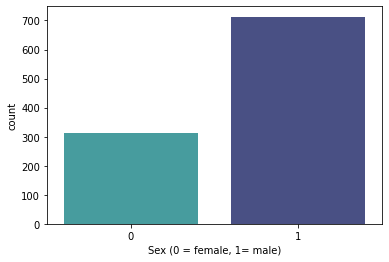

In [11]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [12]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 30.44%
Percentage of Male Patients: 69.56%


In [13]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


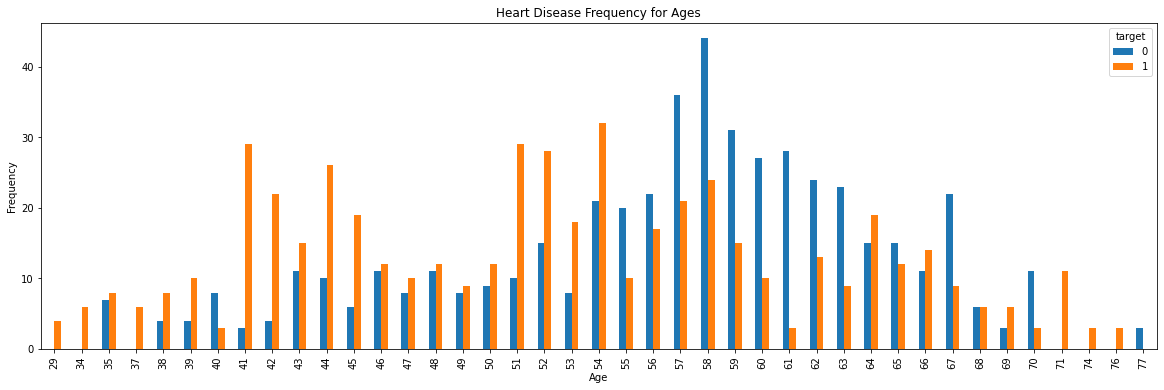

In [14]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

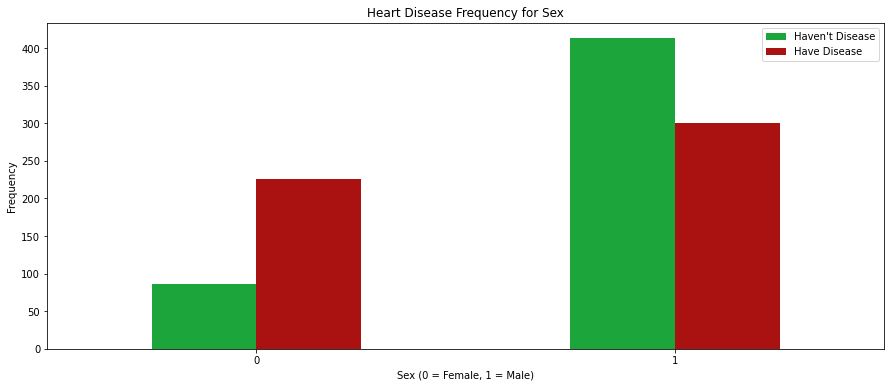

In [15]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

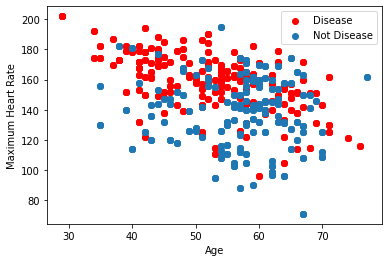

In [16]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

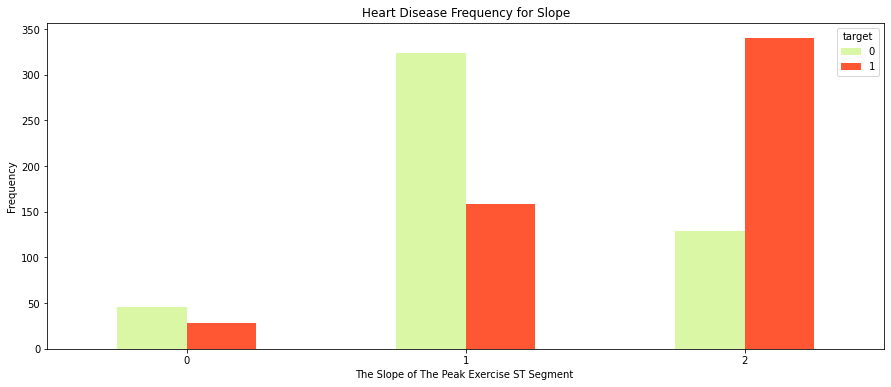

In [17]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

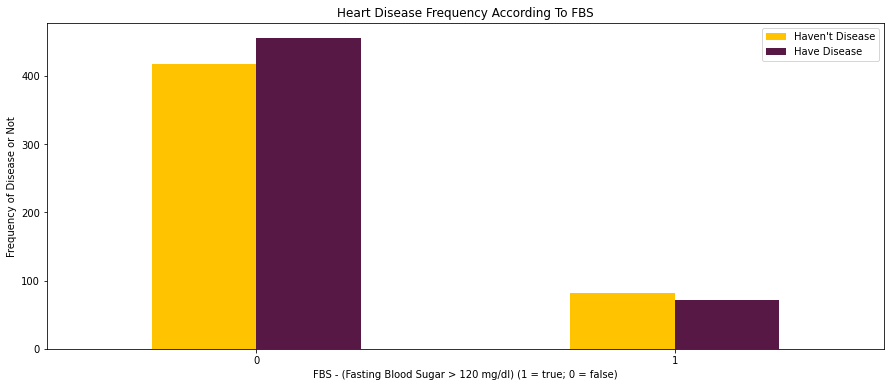

In [18]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

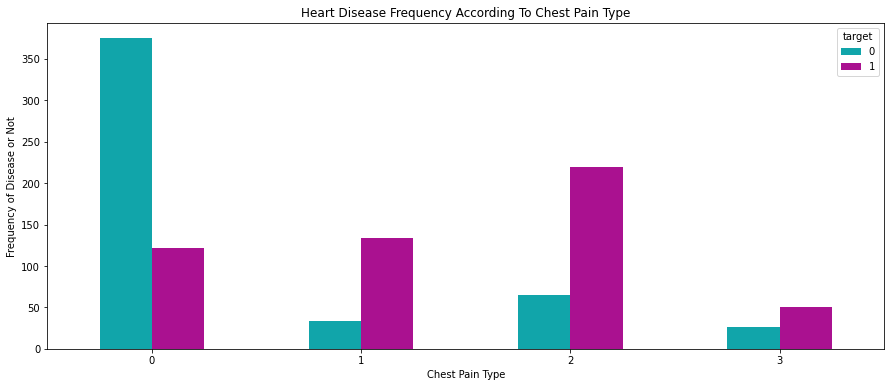

In [19]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

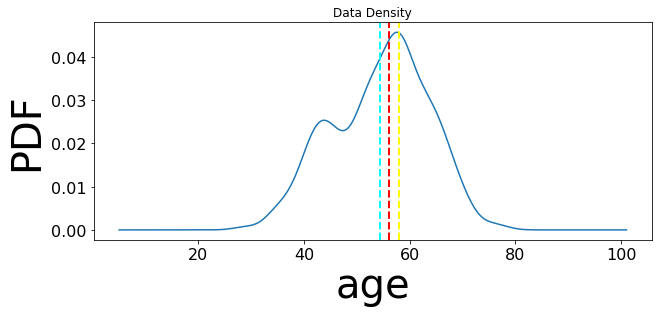

In [20]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    #plt.show()

# Get the density of Grade
col = df['age']
show_density(col)
#plt.xlim([0,120000])
plt.ylabel("PDF", fontsize = 40)
plt.xlabel("age", fontsize = 40)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.savefig("PDF_age.png",bbox_inches='tight')
plt.show()

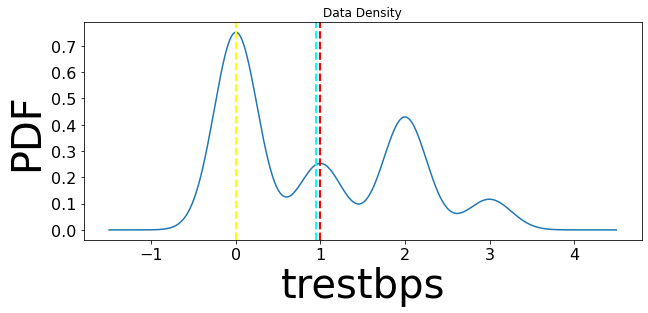

In [21]:
# Get the density of Grade
col = df['cp']
show_density(col)
#plt.xlim([0,120000])
plt.ylabel("PDF", fontsize = 40)
plt.xlabel("trestbps", fontsize = 40)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.savefig("PDF_cp.png",bbox_inches='tight')
plt.show()

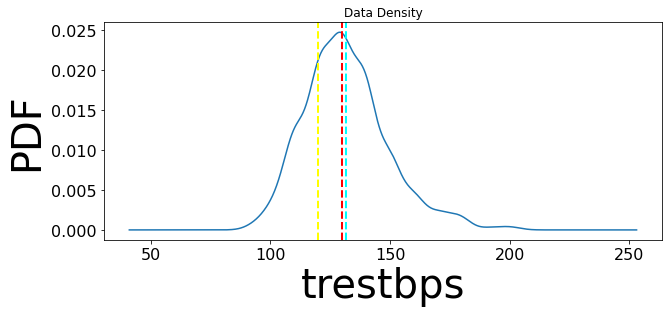

In [22]:

# Get the density of Grade
col = df['trestbps']
show_density(col)
#plt.xlim([0,120000])
plt.ylabel("PDF", fontsize = 40)
plt.xlabel("trestbps", fontsize = 40)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.savefig("PDF_trestbps.png",bbox_inches='tight')
plt.show()

# Model development

In [23]:
cp_onehot = pd.get_dummies(df['cp'],prefix = 'cp')
thal_onehot = pd.get_dummies(df['thal'],prefix = 'thal')
slope_onehot = pd.get_dummies(df['slope'],prefix = 'slope')
df = pd.concat([df,cp_onehot,thal_onehot,slope_onehot], axis=1)
X = df.drop(columns = ['cp', 'thal', 'slope','target'])
cols = X.columns

X = X.to_numpy().astype('float64')
print('The size of the dummy variables for the categorical features is',X.shape)

The size of the dummy variables for the categorical features is (1025, 21)


In [24]:
Y = df['target'].to_numpy()
print('The size of the target dataset (Y) is',Y.shape)
Y[0:5]

The size of the target dataset (Y) is (1025,)


array([0, 0, 0, 0, 0])

In [25]:
## scale
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X = scl.fit_transform(X)
print("means should be 0, std should be 1")
print(X.mean(axis=0))
print(X.std(axis=0))

means should be 0, std should be 1
[-3.43140150e-16  1.80235231e-16 -7.03610612e-16 -3.46606213e-18
 -4.15927455e-17 -8.31854910e-17 -4.33257766e-16 -7.62533668e-17
 -2.42624349e-16  1.81968262e-17 -2.07963728e-17 -5.54569940e-17
 -4.15927455e-17 -3.81266834e-17 -2.94615281e-17  6.06560872e-17
 -6.23891183e-17 -2.77284970e-17  3.03280436e-17  4.67918387e-17
 -3.46606213e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print('The size of the training dataset (X_train) is',X_train.shape)
print('The size of the test dataset (X_test) is',X_test.shape)

The size of the training dataset (X_train) is (820, 21)
The size of the test dataset (X_test) is (205, 21)


# Ridge Classifier

In [27]:
from sklearn.linear_model import RidgeClassifier

# ## simple regression
# lmod = RidgeClassifier(alpha=1.0, fit_intercept=True)
# lmod.fit(X_train,y_train)

# yhat_linear = lmod.predict(X_test)

In [28]:
# from sklearn.metrics import r2_score
# from sklearn.metrics import accuracy_score

# print("Ridge Classifier Score: {:.2f}%".format(accuracy_score(y_test, yhat_linear)*100))

In [29]:
from sklearn.model_selection import GridSearchCV

model = RidgeClassifier(alpha=1.0, fit_intercept=True) # create the knn model

### cross val on a grid using sklearn GridSearchCV

# hyperparamter values to try in the gid search
param_grid={'alpha' : [0.001,0.01,0.1,0.5,1]}

# grid  is the grid searh object
grid = GridSearchCV(model,param_grid,cv=10,scoring='accuracy',n_jobs = 28)

# now run the grid search
grid.fit(X_train,y_train)

grid.best_params_ #best value from grid
grid.best_index_ # index of best value from grid check
print(grid.best_params_['alpha'])


temp = grid.cv_results_ # results from the grid search (a dictionary)
print(temp.keys()) # what is in temp
temp['mean_test_score'] # this is the average score over folds at the values in param_grid


0.001
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_alpha', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


array([0.85121951, 0.85121951, 0.85121951, 0.85121951, 0.85121951])

In [30]:
ridge_model = RidgeClassifier(alpha = grid.best_params_['alpha'], fit_intercept=True)
ridge_model.fit(X_train,y_train)

yhat_ridge = ridge_model.predict(X_test)

from sklearn.metrics import accuracy_score

print("Ridge Classifier Score: {:.2f}%".format(accuracy_score(y_test, yhat_ridge)*100))

Ridge Classifier Score: 82.93%


In [31]:
score_ridge_c = accuracy_score(y_test, yhat_ridge)*100

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#print(confusion_matrix(y_test, yhat, labels=[1,0]))

Confusion matrix, without normalization
[[84 10]
 [25 86]]


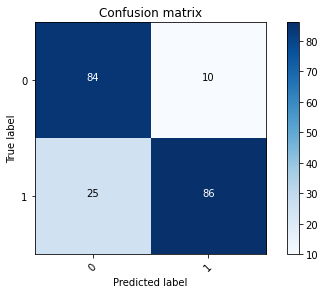

In [33]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(yhat_ridge,y_test, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],normalize= False,  title='Confusion matrix')

In [34]:
for i in range(len(cols)):
  print(cols[i],ridge_model.coef_[0][i])

age -0.028472560434323443
sex -0.1481185529298974
trestbps -0.03802753971470029
chol -0.042048225662145604
fbs 0.014199094937021399
restecg 0.06754410909686058
thalach 0.0897233445303528
exang -0.1241135608530989
oldpeak -0.1410817114555019
ca -0.17367939753531503
cp_0 -0.14137828940718886
cp_1 0.027658019491846784
cp_2 0.08249492191054476
cp_3 0.08923731287952838
thal_0 -0.010475814235021896
thal_1 -0.0013864891532592673
thal_2 0.10831093533509208
thal_3 -0.10788953482642329
slope_0 0.014905994052195361
slope_1 -0.0557780466104466
slope_2 0.04813723157486241


* Sex, exang, oldpeak, ca, cp_0,  thal are important variables

# KNN

In [35]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

print("{} KNN Score: {:.2f}%".format(2, accuracy_score(y_test, knn_yhat)*100))

2 KNN Score: 97.07%


In [36]:
sum(knn_yhat == y_test) / len(y_test)

0.9707317073170731

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#print(confusion_matrix(y_test, yhat, labels=[1,0]))

Confusion matrix, without normalization
[[109   6]
 [  0  90]]


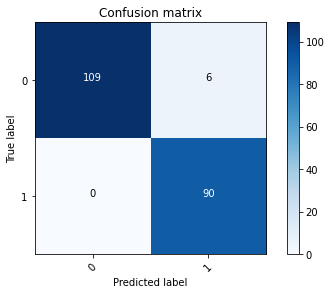

In [38]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(knn_yhat,y_test, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],normalize= False,  title='Confusion matrix')

In [39]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier(n_jobs = -1) # create the knn model

### cross val on a grid using sklearn GridSearchCV

# hyperparamter values to try in the gid search
kvec = np.arange(20) + 2 #values of k to try
#param_grid={'n_neighbors' : kvec,'weights' : ('uniform', 'distance'), 'p' : [1,2], 'leaf_size': [30,40]} # Takes to much time
param_grid={'n_neighbors' : kvec, 'weights' : ('uniform', 'distance')}

# grid  is the grid searh object
grid = GridSearchCV(model,param_grid,cv=10,scoring='accuracy',n_jobs = 28)

# now run the grid search
grid.fit(X_train,y_train)

grid.best_params_ #best value from grid
grid.best_index_ # index of best value from grid check
print(grid.best_params_['n_neighbors'])


temp = grid.cv_results_ # results from the grid search (a dictionary)
print(temp.keys()) # what is in temp
temp['mean_test_score'] # this is the average score over folds at the values in param_grid

#rmsevals = np.sqrt(temp['mean_test_score'])

13
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'param_weights', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


array([0.97, 0.99, 0.93, 0.99, 0.87, 0.99, 0.84, 0.99, 0.85, 0.99, 0.86,
       0.99, 0.85, 0.99, 0.86, 0.99, 0.85, 0.99, 0.84, 0.99, 0.83, 0.99,
       0.85, 0.99, 0.84, 0.99, 0.85, 0.99, 0.84, 0.99, 0.84, 0.99, 0.84,
       0.99, 0.84, 0.99, 0.85, 0.99, 0.85, 0.99])

In [40]:
len(temp['mean_test_score'])

40

In [41]:
grid.best_params_['weights']

'distance'

In [42]:
# # plot
# plt.figure(figsize=(8,8))
# plt.plot(kvec,rmsevals[0::2]) # plot model complexity vs. rmse for wigths
# #plt.xlabel('k',size='x-large')
# #plt.ylabel('rmse',size='x-large')
# #plt.title('rmse from GridSearch')
# #plt.show

# # plot
# plt.plot(kvec,rmsevals[1::2]) # plot model complexity vs. rmse
# #plt.xlabel('k',size='x-large')
# #plt.ylabel('rmse',size='x-large')
# #plt.title('rmse from GridSearch')

# plt.xlabel('k', fontsize = 40); plt.ylabel('rmse', fontsize = 40)
# plt.xticks(fontsize= 16)
# plt.yticks(fontsize= 16)
# plt.legend(['Unifrom', 'distance'])
# plt.savefig("KNN.png",bbox_inches='tight')

# plt.show()

In [43]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [44]:
KNNm = KNeighborsClassifier(n_neighbors = grid.best_params_['n_neighbors'], weights = grid.best_params_['weights'])
KNNm.fit(X_train,y_train)

yhat_KNN = KNNm.predict(X_test)

print("KNN Score: {:.2f}%".format(accuracy_score(y_test, yhat_KNN)*100))


KNN Score: 100.00%


In [45]:
score_KNN = accuracy_score(y_test, knn_yhat)*100

Confusion matrix, without normalization
[[109   0]
 [  0  96]]


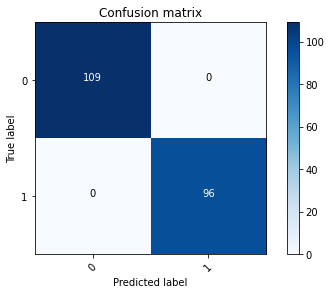

In [46]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(yhat_KNN,y_test, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],normalize= False,  title='Confusion matrix')

# NN

Text(0, 0.5, 'loss')

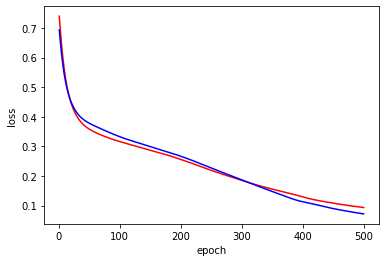

In [47]:
### fit neural net with small number of units and not much L2 regularization

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout, Dense

#make model
lp2pen = 0
#nx = x_train.shape
nn1 = models.Sequential()
nn1.add(layers.Dense(units=100,activation='tanh',kernel_regularizer = regularizers.l2(lp2pen),input_shape=(X_train.shape[1],)))
#nn1.add(Dropout(0.2))
nn1.add(layers.Dense(units=10,activation='tanh',kernel_regularizer = regularizers.l2(lp2pen)))
#nn1.add(Dropout(0.2))
#nn1.add(layers.Dense(units=5,activation='relu',kernel_regularizer = regularizers.l2(lp2pen)))
#nn1.add(layers.Dense(units=50,activation='linear',kernel_regularizer = regularizers.l2(lp2pen)))
#nn1.add(Dropout(0.2))
#nn1.add(layers.Dense(units=20,activation='relu',kernel_regularizer = regularizers.l2(lp2pen)))
#nn1.add(Dropout(0.2))
#nn1.add(layers.Dense(units=10,activation='relu',kernel_regularizer = regularizers.l2(lp2pen)))
#nn1.add(Dropout(0.2))
#nn1.add(layers.Dense(units=5,activation='linear',kernel_regularizer = regularizers.l2(lp2pen)))
nn1.add(layers.Dense(units=1,activation='sigmoid'))

#compile model
nn1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# fit
nhist = nn1.fit(X_train,y_train,epochs=500,verbose=0,batch_size=1000,validation_data=(X_test,y_test))

### plot training by epoch
trL = nhist.history['loss']
teL = nhist.history['val_loss']
epind = range(1,len(trL)+1)
plt.plot(epind,trL,c='red')
plt.plot(epind,teL,c='blue')
plt.xlabel('epoch'); plt.ylabel('loss')

In [48]:
nn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2200      
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3,221
Trainable params: 3,221
Non-trainable params: 0
_________________________________________________________________


In [49]:
yhat_NN = nn1.predict(X_test)


7/7 [==============================] - 0s 1ms/step


In [50]:
yhat_NN = np.where(yhat_NN > 0.5, 1,0)

In [51]:
print("NN Score: {:.2f}%".format(accuracy_score(y_test, yhat_NN)*100))

NN Score: 98.54%


In [52]:
score_NN = accuracy_score(y_test, yhat_NN)*100

Confusion matrix, without normalization
[[109   3]
 [  0  93]]


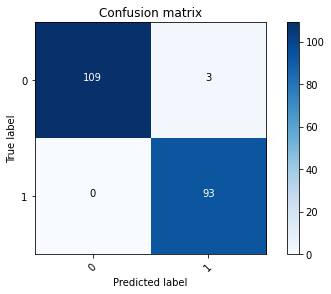

In [53]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(yhat_NN,y_test, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],normalize= False,  title='Confusion matrix')

# SVM

In [54]:
from sklearn.svm import SVC

# SVR 
SVCmod = SVC() # Let's do GridSearchCV for this model

# hyperparamter values to try in the gid search
#param_grid={'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
#                        'C' : [0.001,0.01,0.1,0.5,1,2,3,4]}
param_grid={'kernel' : ['rbf'],
                        'C' : [0.1,0.5,1,2,4,5,10,20,40]}
# grid  is the grid searh object
grid = GridSearchCV(SVCmod,param_grid,cv=10,scoring='accuracy',n_jobs = 28)

# now run the grid search
grid.fit(X_train,y_train)

grid.best_params_ #best value from grid
grid.best_index_ # index of best value from grid
#check
print(grid.best_params_)

temp = grid.cv_results_ # results from the grid search (a dictionary)
print(temp.keys()) # what is in temp
temp['mean_test_score'] # this is the average score over folds at the values in param_grid

#transform to rmse
accvals = temp['mean_test_score']

{'C': 40, 'kernel': 'rbf'}
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


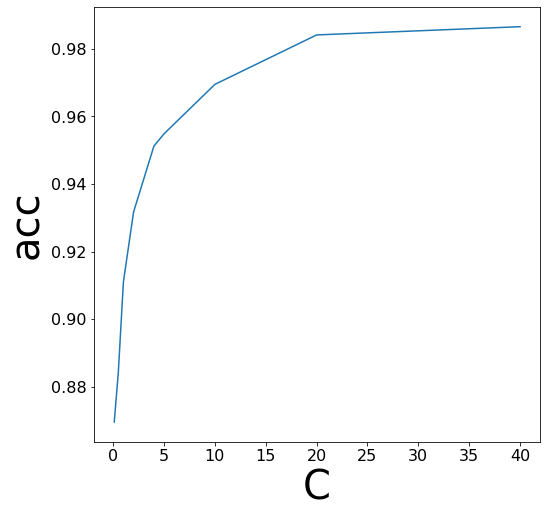

In [55]:
# plot
plt.figure(figsize=(8,8))
C_SVM = [0.1,0.5,1,2,4,5,10,20,40]
plt.plot(C_SVM,accvals) 

plt.xlabel('C', fontsize = 40); plt.ylabel('acc', fontsize = 40)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.savefig("SVM.png",bbox_inches='tight')

plt.show()


In [56]:
SVCmod = SVC(kernel = grid.best_params_['kernel'], 
                             C = grid.best_params_['C'])

SVCmod.fit(X_train,y_train)

#fitted values
yhat_SVR = SVCmod.predict(X_test)

print("SVM Score: {:.2f}%".format(accuracy_score(y_test, yhat_SVR)*100))

SVM Score: 100.00%


In [57]:
score_SVM = accuracy_score(y_test, yhat_SVR)*100

Confusion matrix, without normalization
[[109   0]
 [  0  96]]


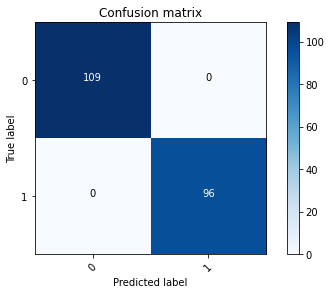

In [58]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(yhat_SVR,y_test, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],normalize= False,  title='Confusion matrix')

# DT

In [59]:
from sklearn.tree import DecisionTreeClassifier

# tree with at most 10 bottom nodes
tmod = DecisionTreeClassifier() # Let's do GridSearchCV for this model

# hyperparamter values to try in the gid search
#param_grid={'criterion' : ('squared_error', 'friedman_mse', 'absolute_error', 'poisson'), 'max_leaf_nodes': [150,160,170,180,190,200,210], 'max_features' : ('auto', 'log2', 'sqrt')}
param_grid={'max_leaf_nodes': [150,160,170,180,190,200,210], 'max_features' : ['auto']}

# grid  is the grid searh object
grid = GridSearchCV(tmod,param_grid,cv=10,scoring='accuracy',n_jobs = 28)

# now run the grid search
grid.fit(X_train,y_train)

grid.best_params_ #best value from grid
grid.best_index_ # index of best value from grid
#check
print(grid.best_params_)

temp = grid.cv_results_ # results from the grid search (a dictionary)
print(temp.keys()) # what is in temp
temp['mean_test_score'] # this is the average score over folds at the values in param_grid

#transform to rmse
accvals = temp['mean_test_score']


{'max_features': 'auto', 'max_leaf_nodes': 180}
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_features', 'param_max_leaf_nodes', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


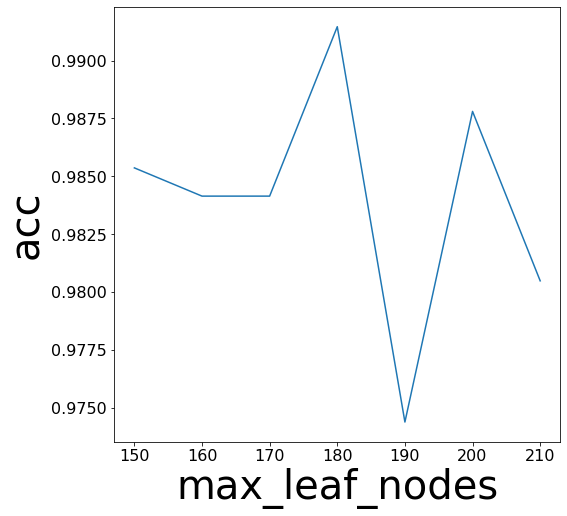

In [60]:
# plot
plt.figure(figsize=(8,8))
max_leaf_nodes = [150,160,170,180,190,200,210]
plt.plot(max_leaf_nodes,accvals) 

plt.xlabel('max_leaf_nodes', fontsize = 40); plt.ylabel('acc', fontsize = 40)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.savefig("DT.png",bbox_inches='tight')

plt.show()

In [61]:
tmod = DecisionTreeClassifier( max_leaf_nodes = grid.best_params_['max_leaf_nodes'],
                             max_features = grid.best_params_['max_features'])
tmod.fit(X_train,y_train)

#fitted values
yhat_DT = tmod.predict(X_test)

print("DT Score: {:.2f}%".format(accuracy_score(y_test, yhat_SVR)*100))

DT Score: 100.00%


In [62]:
score_DT = accuracy_score(y_test, yhat_SVR)*100

Confusion matrix, without normalization
[[109   0]
 [  0  96]]


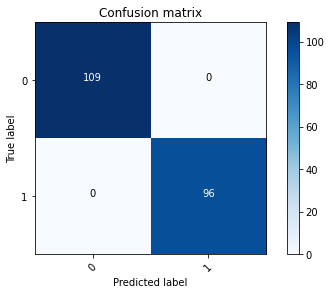

In [63]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(yhat_DT,y_test, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],normalize= False,  title='Confusion matrix')

In [64]:
### variable importance
 
varimp = tmod.feature_importances_
print('variable importances:',varimp)
print(pd.Series(tmod.feature_importances_))

variable importances: [0.08 0.03 0.07 0.12 0.   0.03 0.04 0.05 0.23 0.15 0.02 0.   0.04 0.
 0.   0.   0.05 0.05 0.   0.01 0.03]
0     0.080299
1     0.028536
2     0.066967
3     0.115914
4     0.000000
5     0.034132
6     0.044393
7     0.049931
8     0.225207
9     0.147310
10    0.018050
11    0.000000
12    0.038728
13    0.004064
14    0.000000
15    0.000000
16    0.050486
17    0.051402
18    0.000869
19    0.009628
20    0.034084
dtype: float64


In [65]:
for i in range(len(cols)):
  print(cols[i],varimp[i])

age 0.08029912679464415
sex 0.028535690715263195
trestbps 0.06696662258818128
chol 0.11591443085006836
fbs 0.0
restecg 0.03413225798397505
thalach 0.04439334916604959
exang 0.04993088751380784
oldpeak 0.22520724054213134
ca 0.14730995284160572
cp_0 0.01804952404159062
cp_1 0.0
cp_2 0.03872790894257799
cp_3 0.004064152901362204
thal_0 0.0
thal_1 0.0
thal_2 0.05048608026720201
thal_3 0.051401788576013845
slope_0 0.0008692771483469182
slope_1 0.009628135123719324
slope_2 0.03408357400346051


* Slope_2, ca, chol, age are the most influential features

# RF

In [66]:
from sklearn.ensemble import RandomForestClassifier


In [67]:
model = RandomForestClassifier(n_estimators=35, max_depth=6, random_state=1) # parameters modified to prevent over fitting
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)

score = model.score(X_test, y_test)
print('Testing Score:', score)

output = pd.DataFrame({'Predicted':Y_pred}) # Heart-condition (1 or 0)
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("Percentage predicted to have heart-disease:", rate_people)
score_rfc = score
out_rfc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

Training Score: 0.9670731707317073
Testing Score: 0.9609756097560975
   Predicted
0          0
1          1
2          1
3          0
4          0
Percentage predicted to have heart-disease: 0.47804878048780486
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       109
           1       0.95      0.97      0.96        96

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



In [68]:
score_RF = score*100

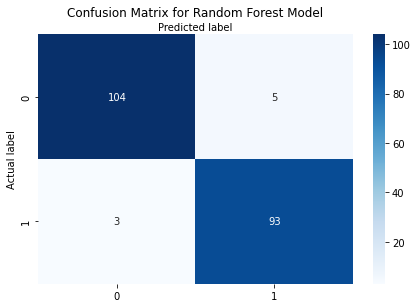

In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Blues', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix for Random Forest Model')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

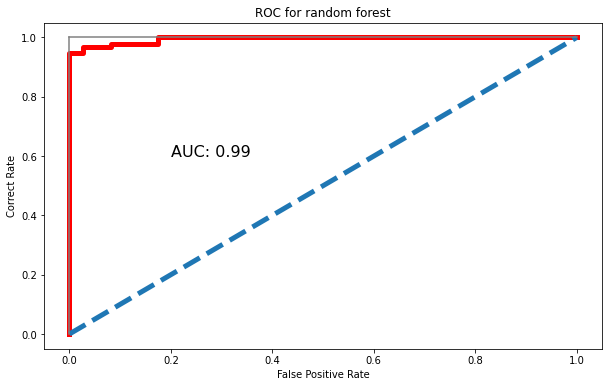

In [70]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for random forest')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='red')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('Correct Rate')
plt.show()

# GB

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
xgbMod = GradientBoostingClassifier(n_estimators=100)
xgbMod.fit(X_train,y_train)
xgbMod

yhat = xgbMod.predict(X_test)
print('The accuracy of the XGBoost Model is:', accuracy_score(y_test, yhat))

The accuracy of the XGBoost Model is: 0.9902439024390244


In [73]:
score_GB = accuracy_score(y_test, yhat)*100

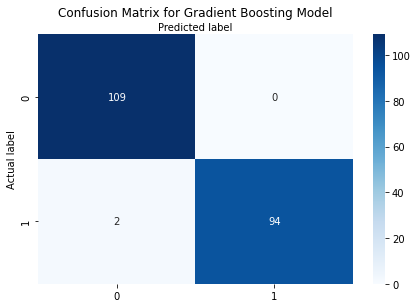

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,yhat)

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Blues', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix for Gradient Boosting Model')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Results

In [75]:
results=pd.DataFrame(columns=['score'])
results.loc['Ridge Classifier'] = [score_ridge_c]
results.loc['KNN'] = [score_KNN]
results.loc['Neural Network'] = [score_NN]
results.loc['Support Vector Machine'] = [score_SVM]
results.loc['Decision Tree'] = [score_DT]
results.loc['Random Forest'] = [score_RF]
results.loc['Gradient Boost'] = [score_GB]

In [76]:
results.sort_values('score',ascending=False).style.background_gradient(cmap='Greens',subset=['score'])

,score
Support Vector Machine,100.000000
Decision Tree,100.000000
Gradient Boost,99.024390
Neural Network,98.536585
KNN,97.073171
Random Forest,96.097561
Ridge Classifier,82.926829
